## AQI Data

Daily AQI data downloaded from the EPA (United States Environmental Protection Agency)

https://www.epa.gov/outdoor-air-quality-data/download-daily-data

Data downloaded with these options
- Pollutants: CO, PM2.5, PM10, NO2, Ozone
- Year: 2025
- Geographic Area: County: CA - Los Angeles
- Monitor Site: All Sites (filtered to sites )

Notes about the pollutants
- PM2.5: primary indicator of wildfire smoke
- PM10: larger particules than PM2.5
- NO2: can provide nutrients for phytoplankton growth
- CO2 and Ozone: unlikely to directly affect ocean chlorophyll

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.patches as mpatches


In [2]:
df_pm25 = pd.read_csv('../data/LA_PM25_2025.csv')
print("PM2.5 local sites:", df_pm25["Local Site Name"].unique())
df_pm10 = pd.read_csv('../data/LA_PM10_2025.csv')
print("PM10 local sites:", df_pm10["Local Site Name"].unique())
df_no2 = pd.read_csv('../data/LA_NO2_2025.csv')
print("NO2 local sites:", df_no2["Local Site Name"].unique())
df_co = pd.read_csv('../data/LA_CO_2025.csv')
print("CO local sites:", df_co["Local Site Name"].unique())
df_ozone = pd.read_csv('../data/LA_ozone_2025.csv')
print("ozone local sites:", df_ozone["Local Site Name"].unique())


PM2.5 local sites: ['Glendora' 'Los Angeles-North Main Street' 'Reseda' 'Compton'
 'Long Beach-Route 710 Near Road' 'Signal Hill (LBSH)'
 'North Hollywood (NOHO)' 'Santa Clarita' 'Lancaster - Fairgrounds']
PM10 local sites: ['Glendora' 'Los Angeles-North Main Street' 'Long Beach (Hudson)'
 'Signal Hill (LBSH)' 'Lancaster - Fairgrounds']
NO2 local sites: ['Glendora' 'West Los Angeles' 'Los Angeles-North Main Street' 'Reseda'
 'Compton' 'Pico Rivera #2' 'Pomona' 'Pasadena'
 'Long Beach-Route 710 Near Road' 'Signal Hill (LBSH)'
 'North Hollywood (NOHO)' 'Santa Clarita' 'Lancaster - Fairgrounds']
CO local sites: ['Glendora' 'Los Angeles-North Main Street' 'Reseda' 'Compton'
 'Pico Rivera #2' 'Pomona' 'Pasadena' 'Santa Clarita']
ozone local sites: ['Glendora' 'West Los Angeles' 'Los Angeles-North Main Street' 'Reseda'
 'Compton' 'Pico Rivera #2' 'Pomona' 'Pasadena' 'Signal Hill (LBSH)'
 'North Hollywood (NOHO)' 'Santa Clarita' 'Lancaster - Fairgrounds']


West Los Angeles is the closest local site, but not all of the pollutants have West Los Angeles. The second closest is Los Angeles-North Main Street, which is about 10-15 miles east of the Pacific Palisades. Since all of the pollutants are measured at the Los Angeles-North Main Street, I will use data from that site for consistency.

In [3]:
# Merge the data into one dataframe with only data from the Los Angeles-North Main Street site

# Filter the data to be only from LA-North Main Street
df_pm25 = df_pm25[df_pm25["Local Site Name"] == "Los Angeles-North Main Street"]
df_pm10 = df_pm10[df_pm10["Local Site Name"] == "Los Angeles-North Main Street"]
df_no2 = df_no2[df_no2["Local Site Name"] == "Los Angeles-North Main Street"]
df_co = df_co[df_co["Local Site Name"] == "Los Angeles-North Main Street"]
df_ozone = df_ozone[df_ozone["Local Site Name"] == "Los Angeles-North Main Street"]

# Select relevant columns: Date + pollutant concentrations
df_co = df_co[["Date", "Daily Max 8-hour CO Concentration"]]
df_no2 = df_no2[["Date", "Daily Max 1-hour NO2 Concentration"]]
df_ozone = df_ozone[["Date", "Daily Max 8-hour Ozone Concentration"]]
df_pm10 = df_pm10[["Date", "Daily Mean PM10 Concentration"]]
df_pm25 = df_pm25[["Date", "Daily Mean PM2.5 Concentration"]]

# Rename columns to cleaner format
df_co.rename(columns={"Daily Max 8-hour CO Concentration": "CO (ppm)"}, inplace=True)
df_no2.rename(columns={"Daily Max 1-hour NO2 Concentration": "NO2 (ppb)"}, inplace=True)
df_ozone.rename(columns={"Daily Max 8-hour Ozone Concentration": "Ozone (ppb)"}, inplace=True)
df_pm10.rename(columns={"Daily Mean PM10 Concentration": "PM10 (µg/m³)"}, inplace=True)
df_pm25.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5 (µg/m³)"}, inplace=True)

# Merge dataframes on 'Date'
df_merged = df_co.merge(df_no2, on="Date", how="outer")
df_merged = df_merged.merge(df_ozone, on="Date", how="outer")
df_merged = df_merged.merge(df_pm10, on="Date", how="outer")
df_merged = df_merged.merge(df_pm25, on="Date", how="outer")

# Convert Date to datetime format for sorting and analysis
df_merged["Date"] = pd.to_datetime(df_merged["Date"])
df_merged.sort_values("Date", inplace=True)

# Optional: Reset index
df_merged.reset_index(drop=True, inplace=True)

start_date = "2025-01-01"
end_date = "2025-05-01"
df_merged = df_merged[(df_merged["Date"] >= start_date) & (df_merged["Date"] <= end_date)]

# Show result
print(df_merged.head())

        Date  CO (ppm)  NO2 (ppb)  Ozone (ppb)  PM10 (µg/m³)  PM2.5 (µg/m³)
0 2025-01-01       1.1       34.0        0.029          38.0           32.7
1 2025-01-01       1.1       33.2        0.029          38.0           32.7
2 2025-01-02       1.2       48.4        0.019          37.0           20.5
3 2025-01-02       1.2       47.3        0.019          37.0           20.5
4 2025-01-03       1.5       48.4        0.025          40.0           25.6


In [4]:
df = pd.read_csv('../data/noaa_weather_data.csv')
df = df[df['STATION'] == "USW00093197"]
df['DATE'] = pd.to_datetime(df["DATE"])
filtered = df[df['PRCP'] > 0.0]
rain_dates = filtered['DATE'].unique()
rain_dates = pd.to_datetime(rain_dates)
rain_dates

key_rain_dates = ["2025-01-26", "2025-02-06", "2025-02-13", "2025-03-06", "2025-03-13", "2025-03-30", "2025-04-26"]

# Identify consecutive rainy days
rain_blocks = []
start_date = rain_dates[0]
end_date = start_date

for current_date in rain_dates[1:]:
    if current_date - end_date == timedelta(days=1):
        # Continue the current block
        end_date = current_date
    else:
        # Save the previous block and start a new one
        rain_blocks.append((start_date, end_date))
        start_date = end_date = current_date

# Add the last block
rain_blocks.append((start_date, end_date))
rain_blocks

[(Timestamp('2025-01-25 00:00:00'), Timestamp('2025-01-27 00:00:00')),
 (Timestamp('2025-02-04 00:00:00'), Timestamp('2025-02-07 00:00:00')),
 (Timestamp('2025-02-12 00:00:00'), Timestamp('2025-02-14 00:00:00')),
 (Timestamp('2025-03-05 00:00:00'), Timestamp('2025-03-06 00:00:00')),
 (Timestamp('2025-03-11 00:00:00'), Timestamp('2025-03-14 00:00:00')),
 (Timestamp('2025-03-17 00:00:00'), Timestamp('2025-03-17 00:00:00')),
 (Timestamp('2025-03-26 00:00:00'), Timestamp('2025-03-26 00:00:00')),
 (Timestamp('2025-03-30 00:00:00'), Timestamp('2025-03-31 00:00:00')),
 (Timestamp('2025-04-26 00:00:00'), Timestamp('2025-04-26 00:00:00'))]

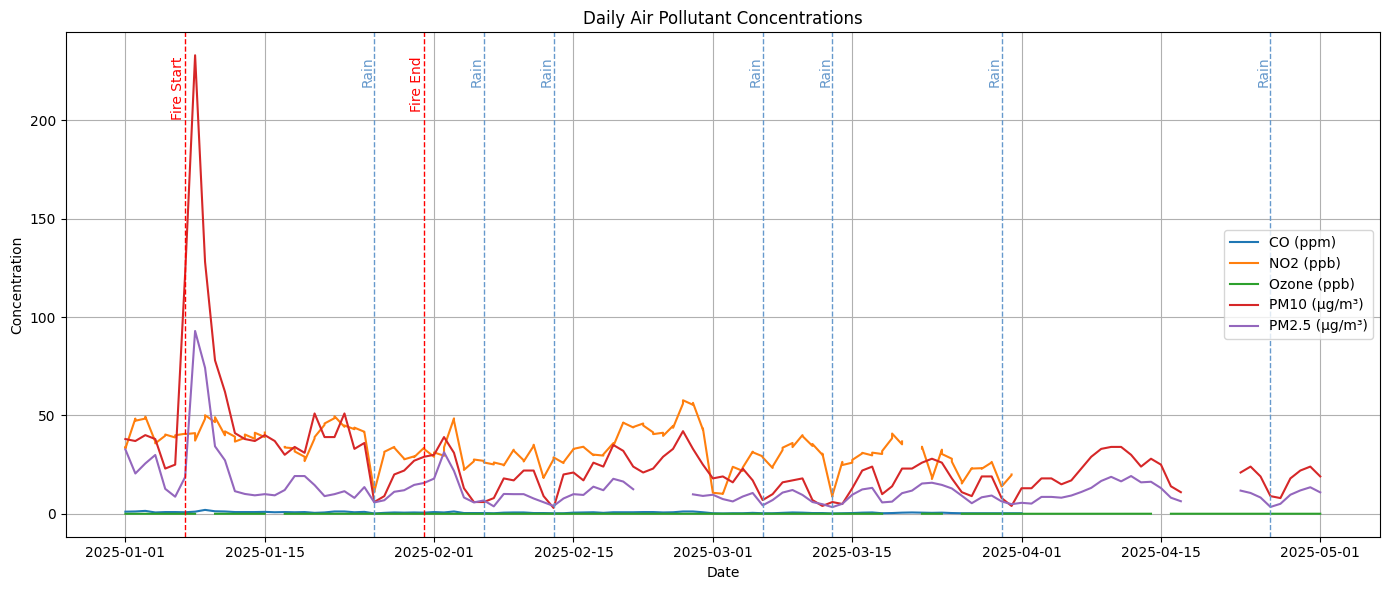

In [5]:
# Plots

plt.figure(figsize=(14, 6))

# Plot each pollutant
plt.plot(df_merged["Date"], df_merged["CO (ppm)"], label="CO (ppm)")
plt.plot(df_merged["Date"], df_merged["NO2 (ppb)"], label="NO2 (ppb)")
plt.plot(df_merged["Date"], df_merged["Ozone (ppb)"], label="Ozone (ppb)")
plt.plot(df_merged["Date"], df_merged["PM10 (µg/m³)"], label="PM10 (µg/m³)")
plt.plot(df_merged["Date"], df_merged["PM2.5 (µg/m³)"], label="PM2.5 (µg/m³)")

# Dashed line to mark wildfire start/end dates
fire_start = pd.to_datetime("2025-01-07")
plt.axvline(x=fire_start, color='red', linestyle='--', linewidth=1)
plt.text(fire_start, plt.ylim()[1]*0.95, 'Fire Start', color='red', rotation=90, ha='right', va='top')

fire_end = pd.to_datetime("2025-01-31")
plt.axvline(x=fire_end, color='red', linestyle='--', linewidth=1)
plt.text(fire_end, plt.ylim()[1]*0.95, 'Fire End', color='red', rotation=90, ha='right', va='top')

for date in key_rain_dates:
    rain_date = pd.to_datetime(date)
    plt.axvline(x=rain_date, color='#6699cc', linestyle='--', linewidth=1)
    plt.text(rain_date, plt.ylim()[1]*0.95, 'Rain', color='#6699cc', rotation=90, ha='right', va='top')

# for start, end in rain_blocks:
#     plt.axvspan(start, end + pd.Timedelta(days=1), color='#6699cc', alpha=0.3)
#     rain_patch = mpatches.Patch(color='#6699cc', alpha=0.3, label='Rain')

plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Daily Air Pollutant Concentrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

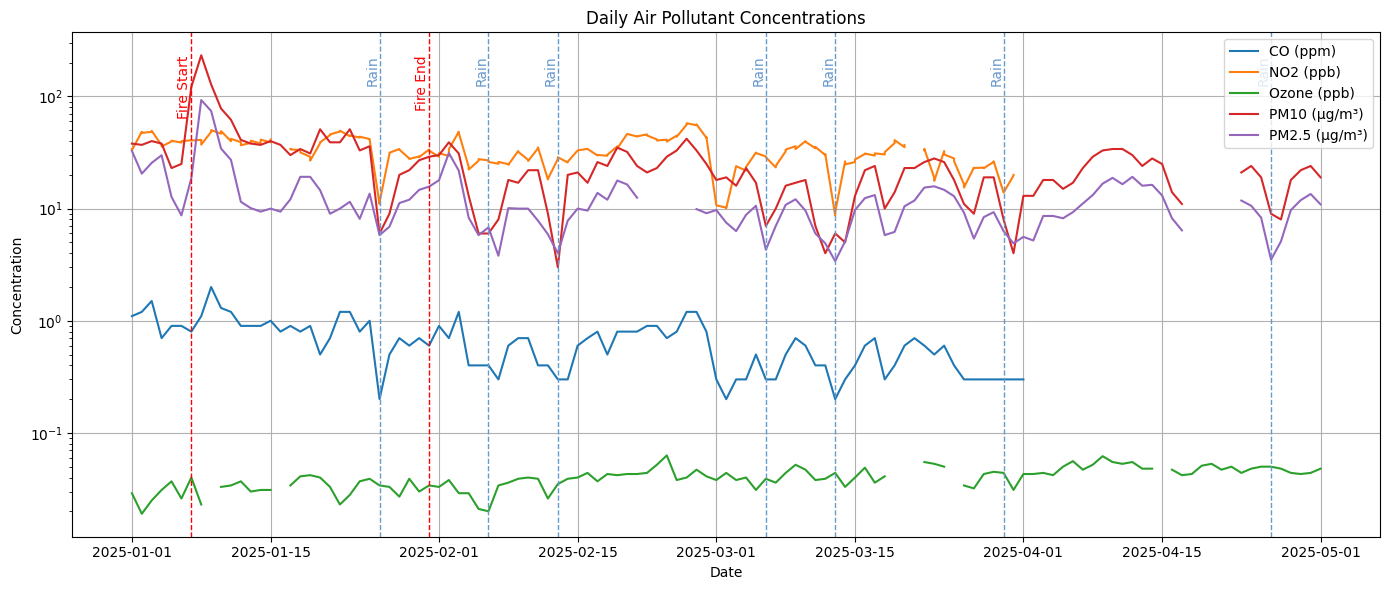

In [6]:
# Plots

plt.figure(figsize=(14, 6))

# Plot each pollutant
plt.plot(df_merged["Date"], df_merged["CO (ppm)"], label="CO (ppm)")
plt.plot(df_merged["Date"], df_merged["NO2 (ppb)"], label="NO2 (ppb)")
plt.plot(df_merged["Date"], df_merged["Ozone (ppb)"], label="Ozone (ppb)")
plt.plot(df_merged["Date"], df_merged["PM10 (µg/m³)"], label="PM10 (µg/m³)")
plt.plot(df_merged["Date"], df_merged["PM2.5 (µg/m³)"], label="PM2.5 (µg/m³)")

# Dashed line to mark wildfire start/end dates
fire_start = pd.to_datetime("2025-01-07")
plt.axvline(x=fire_start, color='red', linestyle='--', linewidth=1)
plt.text(fire_start, plt.ylim()[1]*0.95, 'Fire Start', color='red', rotation=90, ha='right', va='top')

fire_end = pd.to_datetime("2025-01-31")
plt.axvline(x=fire_end, color='red', linestyle='--', linewidth=1)
plt.text(fire_end, plt.ylim()[1]*0.95, 'Fire End', color='red', rotation=90, ha='right', va='top')

for date in key_rain_dates:
    rain_date = pd.to_datetime(date)
    plt.axvline(x=rain_date, color='#6699cc', linestyle='--', linewidth=1)
    plt.text(rain_date, plt.ylim()[1]*0.95, 'Rain', color='#6699cc', rotation=90, ha='right', va='top')

# for start, end in rain_blocks:
#     plt.axvspan(start, end + pd.Timedelta(days=1), color='#6699cc', alpha=0.3)
#     rain_patch = mpatches.Patch(color='#6699cc', alpha=0.3, label='Rain')

# Log scale for Y-axis
plt.yscale("log")

plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Daily Air Pollutant Concentrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There is a large spike in values (espeically PM2.5 and PM10) right after the fire starts. There are also noteable drops in values on dates where it rained. 

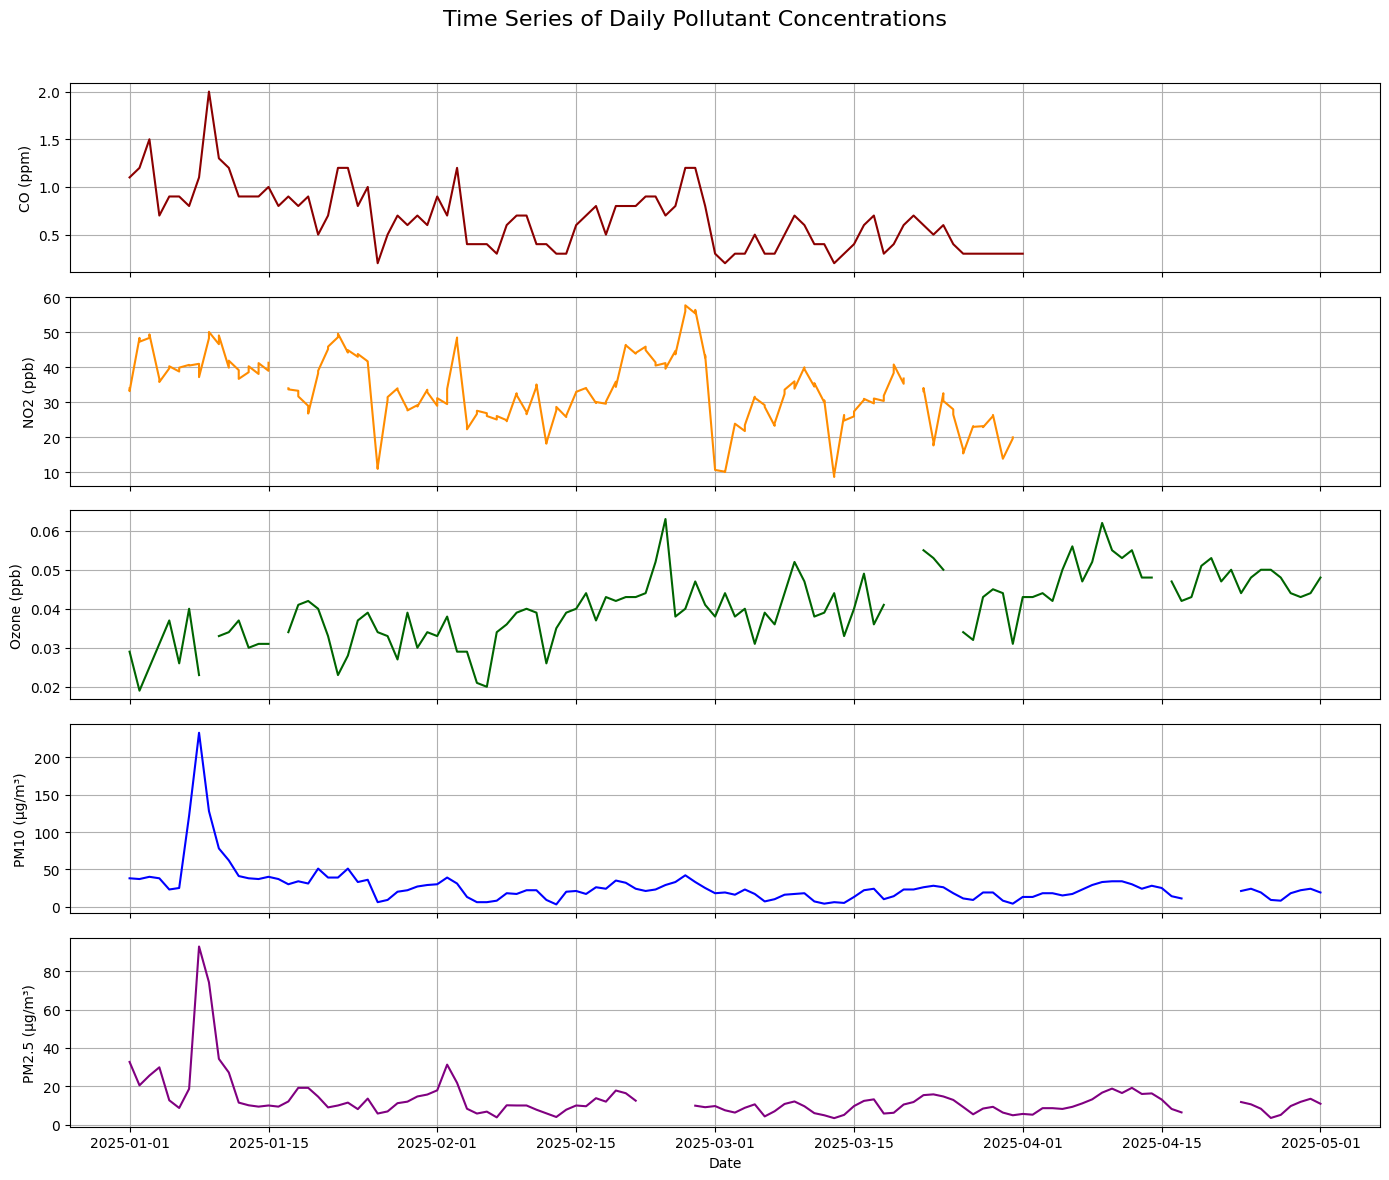

In [21]:
fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True)

pollutants = ["CO (ppm)", "NO2 (ppb)", "Ozone (ppb)", "PM10 (µg/m³)", "PM2.5 (µg/m³)"]
colors = ["darkred", "darkorange", "darkgreen", "blue", "purple"]

for i, pollutant in enumerate(pollutants):
    ax = axs[i]
    ax.plot(df_merged["Date"], df_merged[pollutant], color=colors[i])
    ax.set_ylabel(pollutant)
    ax.grid(True)

    # # Add fire start and end markers
    # for event_date, label, color in [(fire_start, "Fire Start", "red"), (fire_end, "Fire End", "red")]:
    #     ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1)
    #     ax.text(event_date, ax.get_ylim()[1]*0.95, label, color=color, rotation=90, ha='right', va='top')

    # # Add rain markers
    # for date in key_rain_dates:
    #     rain_date = pd.to_datetime(date)
    #     ax.axvline(x=rain_date, color='#6699cc', linestyle='--', linewidth=1)
    #     ax.text(rain_date, ax.get_ylim()[1]*0.95, 'Rain', color='#6699cc', rotation=90, ha='right', va='top')


axs[-1].set_xlabel("Date")
fig.suptitle("Time Series of Daily Pollutant Concentrations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

There is a large spike in PM2.5, PM10, and CO on January 8th, 2025 which is the day after the fire started. These levels seem to normalize / go back to pre-fire levels by around January 13th. 